<a href="https://colab.research.google.com/github/XuRui314/MathematicalModeling/blob/main/%E6%95%B0%E6%A8%A1%E7%AC%AC%E4%B8%80%E6%AC%A1%E7%BB%83%E4%B9%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 长江水质的评价和预测

**题干描述：**

附件3给出了长江沿线17个观测站（地区）近两年多主要水质指标的检测数据，以及干流上７个观测站近一年多的基本数据（站点距离、水流量和水流速）。通常认为一个观测站（地区）的水质污染主要来自于本地区的排污和上游的污水。一般说来，江河自身对污染物都有一定的自然净化能力，即污染物在水环境中通过物理降解、化学降解和生物降解等使水中污染物的浓度降低。反映江河自然净化能力的指标称为降解系数。事实上，长江干流的自然净化能力可以认为是近似均匀的，根据检测可知，主要污染物高锰酸盐指数和氨氮的降解系数通常介于0.1~0.5之间，比如可以考虑取0.2(单位：1/天)。附件4是“1995-2004年长江流域水质报告”给出的主要统计数据。下面的附表是国标(GB3838-2002) 给出的《地表水环境质量标准》中4个主要项目标准限值，其中Ⅰ、Ⅱ、Ⅲ类为可饮用水。
请你们研究下列问题：

1. 对长江近两年多的水质情况做出定量的综合评价，并分析各地区水质的污染状况。
2. 研究、分析长江干流近一年多主要污染物高锰酸盐指数和氨氮的污染源主要在哪些地区?
3. 假如不采取更有效的治理措施，依照过去10年的主要统计数据，对长江未来水质污染的发展趋势做出预测分析，比如研究未来10年的情况。（时序？）
4. 根据你的预测分析，如果未来10年内每年都要求长江干流的Ⅳ类和Ⅴ类水的比例控制在20%以内，且没有劣Ⅴ类水,那么每年需要处理多少污水？ 
5. 你对解决长江水质污染问题有什么切实可行的建议和意见。

## 数据处理

因为这是2005年的赛题，所以都是用doc文档来记录数据的，首先需要转成csv文件。

In [1]:
# preparation
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir("/content/drive/MyDrive/dataset/MathModel/Practice1")
!ls

 data.csv  'SimHei .ttf'


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize': (12, 10)})  # 设置画板大小

In [4]:
location = ['四川攀枝花龙洞','重庆朱沱','湖北宜昌南津关','湖南岳阳城陵矶','江西九江河西水厂',
            '安徽安庆皖河口','江苏南京林山','四川乐山岷江大桥','四川宜宾凉姜沟','四川泸州沱江二桥',
            '湖北丹江口胡家岭','湖南长沙新港','湖南岳阳岳阳楼','湖北武汉宗关','江西南昌滁槎','江西九江蛤蟆石','江苏扬州三江营']

In [5]:
time = ['2003-06','2003-07','2003-08','2003-09','2003-10','2003-11','2003-12','2004-01',
        '2004-02','2004-03','2004-04','2004-05','2004-06','2004-07','2004-08','2004-09',
        '2004-10','2004-11','2004-12','2005-01','2005-02','2005-03','2005-04','2005-05','2005-06',
        '2005-07','2005-08','2005-09']

In [6]:
time_total = [val for val in time for i in range(17)] # 把index换一下

In [7]:
import pandas as pd
data = pd.read_csv("data.csv",encoding='gbk') # 编码注意一下
data.index = time_total # 换index

In [8]:
data[0:17]

,点位名称,断面情况,PH,DO,Mn,NH,本月,上月,主要污染指标
2003-06,四川攀枝花龙洞,干流,7.60,6.80,0.2,0.10,II,Ⅱ,NaN
2003-06,重庆朱沱,干流（川-渝省界）,7.63,8.41,2.8,0.34,II,Ⅱ,NaN
2003-06,湖北宜昌南津关,干流（三峡水库出口）,7.07,7.81,5.8,0.55,III,Ⅲ,NaN
2003-06,湖南岳阳城陵矶,干流,7.58,6.47,2.9,0.34,II,Ⅱ,NaN
2003-06,江西九江河西水厂,干流（鄂-赣省界）,7.34,6.19,1.7,0.13,II,Ⅱ,NaN
2003-06,安徽安庆皖河口,干流,7.52,6.54,3.2,0.22,II,Ⅱ,NaN
2003-06,江苏南京林山,干流（皖-苏省界）,7.78,6.90,3.1,0.11,II,Ⅱ,NaN
2003-06,四川乐山岷江大桥,岷江（与大渡河汇合前）,7.66,4.20,5.8,0.53,IV,Ⅳ,溶解氧
2003-06,四川宜宾凉姜沟,岷江（入长江前）,8.01,7.63,2.4,0.25,II,Ⅱ,NaN
2003-06,四川泸州沱江二桥,沱江（入长江前）,7.63,4.02,3.6,1.06,IV,Ⅳ,溶解氧、氨氮


In [9]:
data['本月'].unique()

array(['II', 'III', 'IV', 'I', 'V', '劣V', 'Ⅱ', 'Ⅲ', 'Ⅳ', '劣Ⅴ', 'Ⅰ', 'Ⅴ'],
      dtype=object)

In [10]:
data['上月'].unique()

array(['Ⅱ', 'Ⅲ', 'Ⅳ', 'Ⅰ', 'II', 'III', 'IV', 'I', '劣V', '劣Ⅴ', 'Ⅴ'],
      dtype=object)

In [11]:
quality = {'II':2, 'III':3, 'IV':3, 'I':1, 'V':5, '劣V':6, 'Ⅱ':2, 'Ⅲ':3, 'Ⅳ':4, '劣Ⅴ':6, 'Ⅰ':1, 'Ⅴ':5}
data['本月'] = data['本月'].map(quality)
data['上月'] = data['上月'].map(quality)

In [12]:
data['主要污染指标'].unique()

array([nan, '溶解氧', '溶解氧、氨氮', '高锰酸盐指数', '高锰酸盐指数、溶解氧', '氨氮', '溶解氧、高锰酸盐指数',
       '高锰酸盐指数、氨氮', '溶解氧、高锰酸盐指数、氨氮', 'pH，氨氮', '高锰酸盐指数，溶解氧', '氨氮，溶解氧'],
      dtype=object)

In [13]:
data[0:17]

,点位名称,断面情况,PH,DO,Mn,NH,本月,上月,主要污染指标
2003-06,四川攀枝花龙洞,干流,7.60,6.80,0.2,0.10,2,2,NaN
2003-06,重庆朱沱,干流（川-渝省界）,7.63,8.41,2.8,0.34,2,2,NaN
2003-06,湖北宜昌南津关,干流（三峡水库出口）,7.07,7.81,5.8,0.55,3,3,NaN
2003-06,湖南岳阳城陵矶,干流,7.58,6.47,2.9,0.34,2,2,NaN
2003-06,江西九江河西水厂,干流（鄂-赣省界）,7.34,6.19,1.7,0.13,2,2,NaN
2003-06,安徽安庆皖河口,干流,7.52,6.54,3.2,0.22,2,2,NaN
2003-06,江苏南京林山,干流（皖-苏省界）,7.78,6.90,3.1,0.11,2,2,NaN
2003-06,四川乐山岷江大桥,岷江（与大渡河汇合前）,7.66,4.20,5.8,0.53,3,4,溶解氧
2003-06,四川宜宾凉姜沟,岷江（入长江前）,8.01,7.63,2.4,0.25,2,2,NaN
2003-06,四川泸州沱江二桥,沱江（入长江前）,7.63,4.02,3.6,1.06,3,4,溶解氧、氨氮


In [14]:
group = data.groupby('点位名称')

## 问题一
**对长江近两年多的水质情况做出定量的综合评价，并分析各地区水质的污染状况。**

首先分析河流采样点，基本上就是按照干流为上游-下游为总体方向，然后每个地区的支流也是按照上游-下游顺序，比如下图是干流的四川龙洞-重庆朱沱，然后四川这个地区还有岷江等流域。

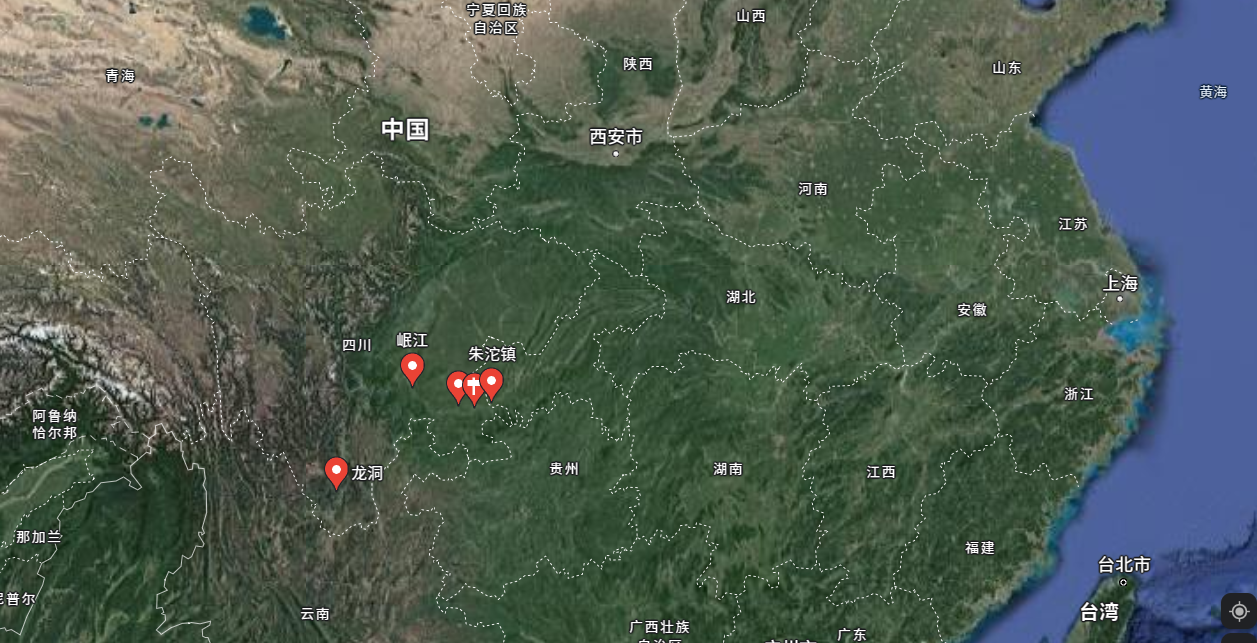

给的数据的那个水质量其实是按照这几个因素最差的级别来给的，要想定量综合评价，肯定是要涉及到所有的考虑的因素的。

**思路一**：相关系数作为weight然后加权作为综合评价的值。

可以考虑Pearson和Spearman系数，但是根据下面的图可以看到实际上数据的分布有些是不满足于整体分布的，所以选择Spearman来做。

In [ ]:
!wget -O /usr/share/fonts/truetype/liberation/simhei.ttf "https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf"
import matplotlib.pyplot as plt
import matplotlib as mpl
zhfont = mpl.font_manager.FontProperties(fname='/usr/share/fonts/truetype/liberation/simhei.ttf')
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
!gdown --id 1fsKERl26TNTFIY25PhReoCujxwJvfyHn

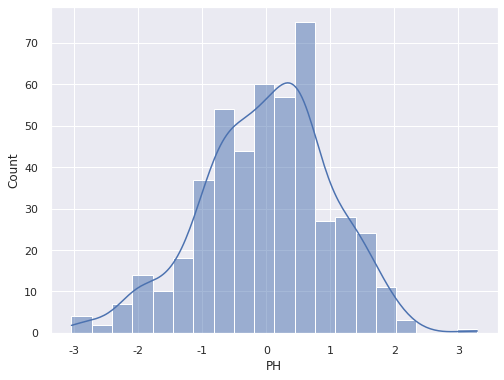

In [27]:
sns.set(rc={'figure.figsize': (8, 6)})  # 设置画板大小

sns.histplot(data['PH'] , kde=True)

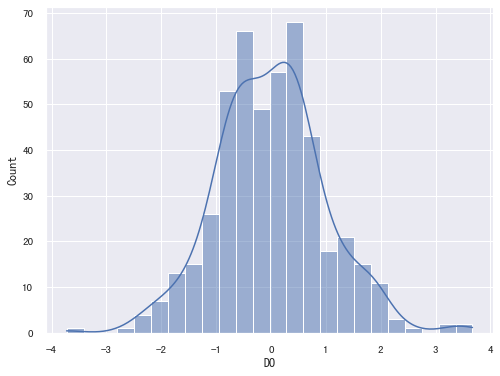

In [24]:
sns.histplot(data['DO'] , kde=True)

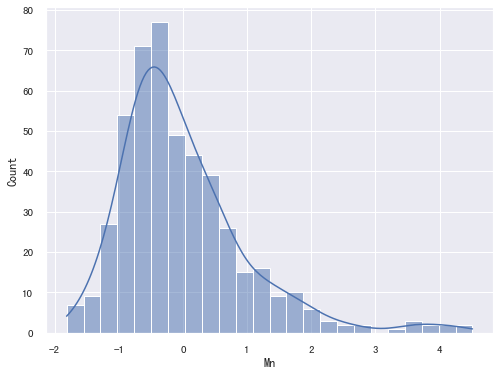

In [25]:
sns.histplot(data['Mn'] , kde=True)

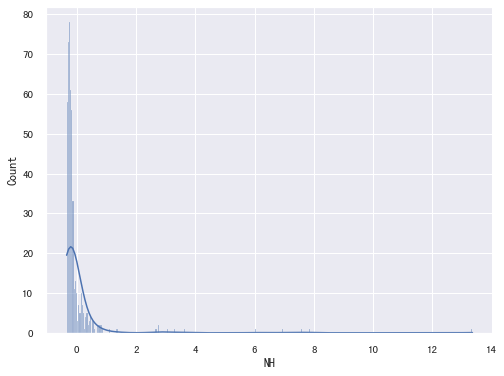

In [26]:
sns.histplot(data['NH'] , kde=True)

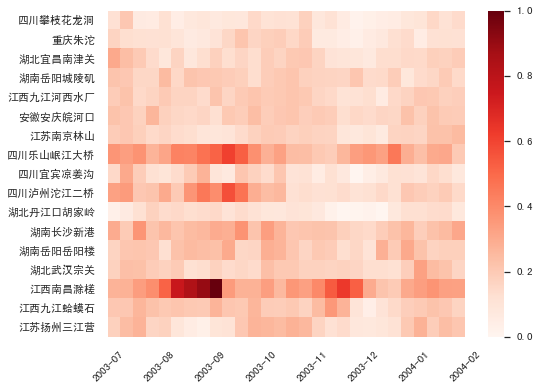

In [21]:
# -*- coding: utf-8 -*-

import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import MultipleLocator

corr_score = dict()
col_name_lst = ['PH', 'DO', 'Mn', 'NH']
# --步骤1. 把'PH', 'DO', 'CODMn', 'NH3-N'的值标准化--
for col_name in col_name_lst:  # 把'PH', 'DO', 'CODMn', 'NH3-N'的值标准化
    mean = data[col_name].mean()
    std = data[col_name].std()
    data[col_name] = (data[col_name] - mean) / std
# --步骤2. 计算spearman相关系数--
for col_name in col_name_lst:
    score = data[col_name].corr(data['本月'], method='spearman')
    corr_score[col_name] = round(score, 4)

# --步骤3. 相关系数归一化--
corr_lst = [abs(i) for i in corr_score.values()]
for c in corr_score.keys():
    corr_score[c] = round(corr_score[c] / sum(corr_lst), 4)

# --步骤4. 把归一化后的相关系数作为权重，计算综合指标，并将综合指标缩放到0-1之间
data['综合指标'] = data['PH'] * corr_score['PH'] + data['DO'] * corr_score['DO'] + data['Mn'] * corr_score['Mn'] + \
               data['NH'] * corr_score['NH']  # 初步计算综合指标
data['综合指标'] = data['综合指标'].apply(lambda x: 4 if x > 4 else x)  # 将综合指标大于4的，全部设为4
v_max = data['综合指标'].max()
v_min = data['综合指标'].min()
data['综合指标'] = data['综合指标'].apply(lambda x: (x - v_min) / (v_max - v_min))  # 将综合指标缩放当0-1之间

# --步骤5. 画热图--
arr = np.zeros((17, 28))  # 初始化热图大小（17个站点，28个月）
y_ticks = []  # 纵轴刻度值
x_ticks = pd.date_range('2003-06', '2005-09', freq='m')  # 横轴刻度赋值
x_ticks = ['%s-%02d' % (i.year, i.month) for i in x_ticks]  # 将横轴刻度值格式化为yyyy-mm形式
for n, id in enumerate(Counter(data['点位名称']).keys()):
    df_tmp = data[data['点位名称'] == id]
    arr[n] = df_tmp['综合指标'].tolist()  # 为热图按站点赋值
    y_ticks.append(id)  # 纵轴刻度赋值

plt.style.use('seaborn') 
zhfont = mpl.font_manager.FontProperties(fname='SimHei .ttf')

sns.set(rc={'figure.figsize': (8, 6)})  # 设置画板大小
sns.set(font="simhei")

plt.figure()

ax = sns.heatmap(arr, cmap='Reds')  # cmap=RdYlBu_r
ax.set_xticklabels(x_ticks, rotation=45)
ax.set_yticklabels(y_ticks, rotation=360)
ax.xaxis.set_major_locator(MultipleLocator(4))  # 将横轴刻度的间隔设为4

plt.show()

然后可以取个平均（等价于求和），再rank一下

In [34]:
a = arr.sum(axis = 1)

In [36]:
a

array([ 2.72872392,  3.30616079,  4.37989204,  5.00051778,  4.85985323,
        5.24967146,  4.39215041,  9.60663056,  3.69644869,  6.73018619,
        2.66806551,  6.87300618,  5.7906992 ,  5.11644236, 12.00128341,
        5.72162325,  4.8827069 ])

In [38]:
indies = np.argsort(a, kind='heapsort')
print(indies) # 这里的值是原来数组的索引，14是最大，代表江西南昌

[10  0  1  8  2  6  4 16  3 13  5 15 12  9 11  7 14]


**思路二：**用模糊评价，选隶属函数然后定个权值求综合的评分。

其实和上面的方法差不多，这个隶属度函数根据每个因素具体的数值分布来定。

然后最后再弄个加权就好了 :)

In [40]:
data[col_name_lst].values

array([[-0.16474073, -0.55599537, -1.81254399, -0.29618533],
       [-0.10220756,  0.30585987, -0.11696175, -0.16026964],
       [-1.26949326, -0.01532842,  1.8394793 , -0.0413434 ],
       ...,
       [-2.6869116 , -2.38141549, -1.22561167,  0.16819329],
       [-0.08136318, -0.24016022, -0.44303525, -0.29052218],
       [-0.01883001, -0.31510416,  0.40475587, -0.18858541]])

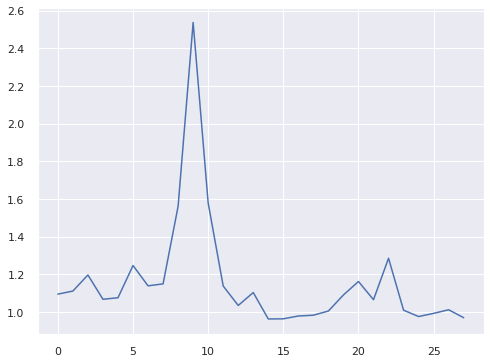

In [45]:
data_matrix = data[col_name_lst].values
# R_data 为隶属度综合评判矩阵
R_data = np.zeros_like(data_matrix)
# W_data为权重矩阵
W_data = np.zeros_like(data_matrix)
S = np.array([0,5,6,1.0])
temp = np.zeros(4)
# 综合评判矩阵以及权重的计算
for i in range(len(data_matrix)):
    for j in range(len(data_matrix[0])):
        if j == 1:
            temp[j] = S[j]/data_matrix[i][j]
            if data_matrix[i][j] <= 2:
                R_data[i][j] = 1
            elif 2 < data_matrix[i][j] < 7.5:
                R_data[i][j] = 1 - (data_matrix[i][j] - 2) / 5.5
            else:
                R_data[i][j] = 0
        elif j == 2:
            temp[j] = data_matrix[i][j] / S[j]
            if data_matrix[i][j] <= 2:
                R_data[i][j] = 0
            elif 2 < data_matrix[i][j] < 15:
                R_data[i][j] = (data_matrix[i][j] - 2) / 13
            else:
                R_data[i][j] = 1
        elif j == 3:
            temp[j] = data_matrix[i][j] / S[j]
            if data_matrix[i][j] <= 0.15:
                R_data[i][j] = 0
            elif 0.15 < data_matrix[i][j] < 2.0:
                R_data[i][j] = (data_matrix[i][j] - 0.15) / 1.85
            else:
                R_data[i][j] = 1
        else:
            if 6 <= data_matrix[i][j] <= 9:
                R_data[i][j] = np.abs(data_matrix[i][j]-7.5)/1.5
            else:
                R_data[i][j] = 1
    temp[0] = 0.15*np.sum(temp[1:])
    W_data[i] = temp / np.sum(temp)

result = np.zeros(len(data_matrix))
for i in range(len(data_matrix)):
    result[i] = np.dot(R_data[i],W_data[i])

# 测试某个站点28个月的得分
result1 = np.zeros(28)
for i in range(28):
    result1[i] = result[i*17+7]

plt.plot(range(len(result1)),result1)
plt.show()


## 问题二

首先明确，污染物来源有两个，上游残余和本地区产生的。

题目里说：根据检测可知，主要污染物高锰酸盐指数和氨氮的降解系数通常介于0.1~0.5之间，比如可以考虑取0.2(单位：1/天)。

所以就建立一个微分方程描述来自下游地区污染物中来自上游的部分:
$$m_{low} = m_{top} * e^{-0.2t} $$
这里的$t$可以拿站点间距离和水流速度算出。

In [ ]:
# -*- coding: utf-8 -*-

import pandas as pd
import math
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

distance_df = pd.read_excel(station_info_path, sheet_name='站点间距离', sep='\t')
velocity_df = pd.read_excel(station_info_path, sheet_name='水流速', sep='\t')

date_lst = ['%s-%02d' % (i.year, i.month) for i in pd.date_range('2004-04', '2005-05', freq='m')]
col_name_lst = ['年月', '点位名称', 'NH3-N', 'CODMn']
station_lst = distance_df['站点'].tolist()
data = data[data['断面情况'].str.contains('干流') & data['年月'].isin(date_lst)][col_name_lst]

coef = 0.2  # 降解系数
distance_lst = distance_df['距离'].to_list()
s_lst = [distance_lst[i] - distance_lst[i - 1] for i in range(1, len(distance_lst))]  # 相邻两站点的路程  单位：km
df_result = pd.DataFrame()
for i in range(len(date_lst)):
    now_date = date_lst[i]  # 当前的站点
    tmp = data[data['年月'].str.contains(now_date)]
    v_lst = velocity_df[velocity_df['年月'] == now_date].values[0][1:]  # 当前站的水流速 单位：m/s
    t_lst = [(1000 * s) / (v * 3600 * 24) for v, s in zip(v_lst[1:], s_lst)]
    rest = [0] + [pow(math.e, -0.2 * t) for t in t_lst]  # 上一个站到下一个站剩余的浓度

    # delta = 当前站的浓度-上一个站剩余的浓度，如果delta>0, 说明当前站的污染物来自两部分：上一站和当前站
    # (a - b)/a表示 本地污染占总污染（本地污染+上游污染）的比例
    tmp['delta_CODMn'] = [round((a - b)/a, 2) if a - b > 0 else 0 for a, b in zip(tmp['CODMn'], rest)]
    tmp['delta_NH3-N'] = [round((a - b)/a, 2) if a - b > 0 else 0 for a, b in zip(tmp['NH3-N'], rest)]
    df_result = df_result.append(tmp)

# 画站点一年的均值图（柱状图）
y_delta_CODMn_mean_lst = []
y_delta_NH3_mean_lst = []
y_CODMn_mean_lst = []
y_NH3_mean_lst = []
x = []
for station_id in Counter(df_result['点位名称']).keys():
    if station_id != '四川攀枝花龙洞': # 去掉第一个站点，因为没有上一站点，所以无法判断污染物来自于上游还是本地
        df_tmp = df_result[df_result['点位名称'] == station_id]
        y_delta_CODMn_mean_lst.append(df_tmp['delta_CODMn'].mean())
        y_delta_NH3_mean_lst.append(df_tmp['delta_NH3-N'].mean())
        y_CODMn_mean_lst.append(df_tmp['CODMn'].mean())
        y_NH3_mean_lst.append(df_tmp['NH3-N'].mean())
        x.append(station_id)

plt.figure()
plt.subplot(2,1,1)
plt.plot(x, y_NH3_mean_lst, marker='o', mfc='w', label='NH3-N')
plt.plot(x, y_CODMn_mean_lst, marker='o', mfc='w', label='CODMn')
plt.xticks(rotation=45)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 以上两行代码功能：在图像上现实中文
plt.legend()
plt.grid()
plt.ylabel('污染物的浓度(mg/L)')
plt.title('本地总污染物浓度')

plt.subplot(2,1,2)
plt.plot(x, y_delta_NH3_mean_lst, marker='o', mfc='w', label='delta NH3-N')
plt.plot(x, y_delta_CODMn_mean_lst, marker='o', mfc='w', label='delta CODMn')
plt.xticks(rotation=45)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 以上两行代码功能：在图像上现实中文
plt.legend()
plt.grid()
plt.ylabel('本地污染占比')
plt.title('本地污染占总污染（本地污染+上游污染）的比例')

plt.show()
